# Demo Notebook

In this notebook, we will show a demo of our RM search pipeline, as well as an example of running numerical simulations to show how the efficiency of memory can alter the outcome of two organisms in competition for resources in the presence of phage. Note that for this demo, BLAST+ and HMMER are both required, however, they are conveniently available for installation via conda:

[BLAST+](https://anaconda.org/bioconda/blast)  
[HMMER](https://anaconda.org/bioconda/hmmer)

The code used to analyze the genus *Microcystis* was applied to over 139,000 Refseq genomes to find full Restriction Modification systems (RMs). If you wish to analyze another Refseq Genomes, you will need to find them in the [Refseq assembly summary](https://ftp.ncbi.nlm.nih.gov/genomes/refseq/assembly_summary_refseq.txt). Additionally, we also show how we use mathematical models to understand the effects of viral memory (through methylation of RMs) on populations under top down control by viruses. These simulations reqiure little memory (1 Gb at most), but they do take a while. Feel free to alter the parameters choosen. See NotebooksAndData/GenMemODE/data/LHS_scheme.csv to look at other replicates we used in our study.

In [1]:
#Data management
import pandas as pd

#Bioinformatic dependencies
from src.pipeline import Comprehensive_Scan
#BLAST (locally installed)
#HMMER (locally installed)

# mathematical modeling
from src.GenMemODE import *

#Graphing with R
%load_ext rpy2.ipython

#setup dirs
import os


In [2]:
#setup our download dir
if not os.path.exists('data/RMsearch/demo_genbank'):
    os.makedirs('data/RMsearch/demo_genbank')

#Creating a file to download genbank files from RefSeq via wget

#Below is a subset of NotebooksAndData/RMsearch/data/assembly_details.csv that only includes Microcystis
assemblies=pd.read_csv('data/RMsearch/demo_assemblies.csv')
wget = []
for i,row in assemblies.iterrows():
    accession = row['ftp'].split('/')[-1]
    address = row['ftp']+'/'+accession+'_genomic.gbff.gz'
    wget.append(address)
with open('data/RMsearch/get_files.txt','w') as f:
    f.write('\n'.join(wget))
assemblies

,assembly,NCBI_taxid,phylum,genus,name,strain,assembly_level,refseq_category,ftp
0,GCF_001725075.1,267869,Cyanobacteria,Microcystis,Microcystis aeruginosa NIES-98,NIES-98,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...
1,GCF_001885655.1,1914537,Cyanobacteria,Microcystis,Microcystis aeruginosa NaRes975,NaRes975,Contig,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...
2,GCF_000312165.1,1160286,Cyanobacteria,Microcystis,Microcystis aeruginosa PCC 9717,PCC 9717,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
3,GCF_000312185.1,1160281,Cyanobacteria,Microcystis,Microcystis aeruginosa PCC 9443,PCC 9443,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
4,GCF_000312205.1,213618,Cyanobacteria,Microcystis,Microcystis aeruginosa PCC 7941,7941,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
5,GCF_000312225.1,1160283,Cyanobacteria,Microcystis,Microcystis aeruginosa PCC 9807,PCC 9807,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
6,GCF_000312245.1,1160284,Cyanobacteria,Microcystis,Microcystis aeruginosa PCC 9808,PCC 9808,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
7,GCF_001704955.2,1698524,Cyanobacteria,Microcystis,Microcystis aeruginosa NIES-2481,NIES-2481,Complete Genome,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...
8,GCF_000981785.2,1641812,Cyanobacteria,Microcystis,Microcystis aeruginosa NIES-2549,NIES-2549,Complete Genome,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
9,GCF_001895325.1,1914535,Cyanobacteria,Microcystis,Microcystis aeruginosa CHAOHU 1326,CHAOHU 1326,Scaffold,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...


In [3]:
%%bash
wget -P data/RMsearch/demo_genbank/ -i data/RMsearch/get_files.txt

--2020-04-21 08:50:55--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/725/075/GCF_001725075.1_ASM172507v1/GCF_001725075.1_ASM172507v1_genomic.gbff.gz
           => ‘data/RMsearch/demo_genbank/GCF_001725075.1_ASM172507v1_genomic.gbff.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/001/725/075/GCF_001725075.1_ASM172507v1 ... done.
==> SIZE GCF_001725075.1_ASM172507v1_genomic.gbff.gz ... 3716178
==> PASV ... done.    ==> RETR GCF_001725075.1_ASM172507v1_genomic.gbff.gz ... done.
Length: 3716178 (3.5M) (unauthoritative)

     0K .......... .......... .......... .......... ..........  1%  286K 13s
    50K .......... .......... .......... .......... ..........  2% 1.36M 7s
   100K .......... .......... .......... .......... 

In [5]:
db_location='data/RMsearch/RMsearch_database/'
gb_dir='data/RMsearch/demo_genbank/'
#fulldataset= db_location+'non-putative_rebase.fasta'
HMM_searchspace= db_location+'RMwithFalsepos.hmm'
BLASTexceptions= db_location+'BLASTexceptions.fasta'
falsepos=db_location+'Falsepos_HMMs.txt'
resultsdir= 'data/RMsearch/results/'

#setup our results dirs
if not os.path.exists('data/RMsearch/results'):
    os.makedirs('data/RMsearch/results')
if not os.path.exists('data/RMsearch/pTIIG'):
    os.makedirs('data/RMsearch/pTIIG')


#If you want to blast the rebase database against each organisms proteome
#the probelibrary must be using the file non-putative_rebase.fasta
#when probe library is blast exceptions, 10x faster
Comprehensive_Scan(target_dir=gb_dir,results_dir=resultsdir,probelibrary=BLASTexceptions,
               HMM=HMM_searchspace,BLASTexceptions=BLASTexceptions,
                   threads=4,FalsePositiveHMMs=falsepos,TenativePositiveHMMs_list=['ResIII'])


Analyzing: GCF_000010625
GCF_000010625 Complete 1/32
########################


Analyzing: GCF_000297435
GCF_000297435 Complete 2/32
########################


Analyzing: GCF_000307995
GCF_000307995 Complete 3/32
########################


Analyzing: GCF_000312165
GCF_000312165 Complete 4/32
########################


Analyzing: GCF_000312185
GCF_000312185 Complete 5/32
########################


Analyzing: GCF_000312205
GCF_000312205 Complete 6/32
########################


Analyzing: GCF_000312225
GCF_000312225 Complete 7/32
########################


Analyzing: GCF_000312245
GCF_000312245 Complete 8/32
########################


Analyzing: GCF_000312265
GCF_000312265 Complete 9/32
########################


Analyzing: GCF_000312285
GCF_000312285 Complete 10/32
########################


Analyzing: GCF_000312725
GCF_000312725 Complete 11/32
########################


Analyzing: GCF_000330925
GCF_000330925 Complete 12/32
########################


Analyzing: GCF_000332585
GCF_00033258

In [6]:
%run src/RM_postprocessing.py

# RM postprocessing
The RM_Postprocessing script gathers the proteins alignments, either via BLAST or HMMER, and attempts to classify full RMs. For our study, RMs that are not concatinated (type I, type II, type III) are required to be within 4000 base pairs of eachother. This script produces several outputs:
1. data/RMsearch/RMdat.csv  
    * csv file showing RM count breakdown
2. data/RMsearch/pTIIG/pTIIG.fasta
    * fasta file of putative type IIG RMs. These proteins are used in sensitive searches via the hhsuite
3. data/RMsearch/RMprotclass.csv
    * A protein breakdown of what is called a full RMs.

__Note:__ RM_postprocessing must be altered if the directories are altered

Lets look a report from a single *Microcystis* genome

In [7]:
RMprotclass = pd.read_csv("data/RMsearch/RMprotclass.csv")
RMprotclass[RMprotclass['orgid'] == 'GCF_001725075']

,orgid,accession,length,type,cluster,rmT1,rmT2,rmT3,rmT?
0,GCF_001725075,NZ_MDZH01000178|17621..20368,915,rT1,NaN,0,0,0,0
1,GCF_001725075,NZ_MDZH01000432|41466..44912,1148,rT1,NaN,0,0,0,0
2,GCF_001725075,NZ_MDZH01000324|complement(97..897),266,rT3,NaN,0,0,0,0
3,GCF_001725075,NZ_MDZH01000459|complement(46334..47215),293,mT2,NaN,0,0,0,0
4,GCF_001725075,NZ_MDZH01000173|16876..18093,405,mT2,NaN,0,0,0,0
5,GCF_001725075,NZ_MDZH01000089|complement(30645..31661),338,mT2,NaN,0,0,0,0
6,GCF_001725075,NZ_MDZH01000432|37911..39398,495,mT1,NaN,0,0,0,0
7,GCF_001725075,NZ_MDZH01000119|15173..17872,899,pT2G,NaN,0,0,0,0
8,GCF_001725075,NZ_MDZH01000173|101580..104633,1017,pT2G,NaN,0,0,0,0
9,GCF_001725075,NZ_MDZH01000411|24292..28125,1277,pT2G,NaN,0,0,0,0


# Context is used to call RM systems
In the report above, we can see that only putative methyltransferases and endonucleases that are not on the same genomic accession (NZ_######) and not 4000 base pairs away are not considered 'clustered'. While each cluster number is arbitrary, they are used to easily identify protein sets that are concidered full RM sysetms, such as cluster 15.0, which is annotated as a type II RM system.

Let's look at our final counts

In [8]:
Microcystis = pd.read_csv("data/RMsearch/RMdat.csv")
Microcystis

,orgid,genus,phyla,GenomeSize(bp),NumContigs,mT1,rT1,sT1,rmT1,mT2,...,rmT2,mT3,rT3,rmT3,T4,T2G,pr,prm,rmT?,pT2G
0,GCF_001725075,Microcystis,Cyanobacteria,4983728,497,3,4,6,0,25,...,6,0,1,0,1,0,0,0,0,10
1,GCF_001885655,Microcystis,Cyanobacteria,5117533,413,4,2,5,1,24,...,7,0,0,0,2,0,0,0,0,6
2,GCF_000312165,Microcystis,Cyanobacteria,5300338,264,4,4,4,0,28,...,8,0,1,0,2,1,0,0,0,8
3,GCF_000312185,Microcystis,Cyanobacteria,5185041,221,1,2,1,0,20,...,3,0,1,0,1,0,0,0,0,7
4,GCF_000312205,Microcystis,Cyanobacteria,4801899,77,5,4,4,0,22,...,5,0,0,0,1,2,0,0,0,11
5,GCF_000312225,Microcystis,Cyanobacteria,5155707,267,2,5,1,1,28,...,8,0,1,0,2,0,0,0,0,7
6,GCF_000312245,Microcystis,Cyanobacteria,5051045,141,3,2,5,1,24,...,7,0,0,0,1,0,0,0,0,6
7,GCF_001704955,Microcystis,Cyanobacteria,4440545,2,4,7,3,1,25,...,7,0,0,0,1,1,0,0,0,11
8,GCF_000981785,Microcystis,Cyanobacteria,4301200,2,4,7,3,1,26,...,9,0,0,0,1,1,0,0,0,9
9,GCF_001895325,Microcystis,Cyanobacteria,5271683,607,1,2,2,0,26,...,5,0,1,0,2,0,0,0,0,9


As we can see, we have sucessfully counted full RMs in *Microcystis*. We will not analyze the putative type IIG proteins, located in data/RMsearch/pTIIG/pTIIG.fasta because that databases required to run hhsuite are large (> 20GB) and computationally expensive. If you wish to continue to analyze the type IIG proteins, go to section II of our RMsearch notebook at NotebooksAndData/RMsearch/RMsearch_12-11-2018.ipynb. Otherwise, this data represents conservative RM counts used to generate Figure S2.

# Numerical Simulations

We will now use sample code to demonstrate the difference between unique and subset RM communities and how they compare to the general and parallel models. Our community will have 3 organisms. In the subset community shown first, one organism will not have RM, one will have one RM 'A', and one with have two RMs 'A' and 'B'. In our second community, we will still have an organism lacking RM, however, the other two will have RM 'A' and the other will have RM 'B' and 'C'

Running the next few cells will take a little bit of time depending on your machine.

In [9]:
def annotate_phage(df):
    '''helper function to help R plots'''
    temp = []
    RM=[]
    for el in df['Population']:
        RM.append(el.split(' ')[-1])
        if 'Phage' in el:
            temp.append("Phage")
        else:
            temp.append("Prokaryote")
    df['Organism']=temp
    df['RM count']= RM
    return(df)

t_final = 2000 #length of individual simulations
steps = 500 #steps per t
Sr_rng = np.logspace(4.5,10,500) #resource range to test
alpha,phi,delta_p,delta_c,beta=1.0,1e-8,.2,.2,25.0 #feel free to try different parameters!
resistance_func=lambda r:(.01**r) #resistance function
cost_func=lambda c:(.1*c) #cost function


#3 organsims, one with no RM, one with RM A, and one with RMs A and B
orgRM=[[],["A"],["A","B"]] #for the general and parallel models, only absolute count of RMs matter


In [10]:
# General
print("Running General Model")
r,members,c=General_interaction(orgRM,resistance_function=resistance_func,cost_function=cost_func)
initvalues=[('R',1)]
for member in members:
    initvalues.append(tuple([member,100]))
traits=load_traits(alpha,phi,delta_p,delta_c,beta,c,r)
dfs =Sr_sweep(Sr_rng,Producer_Consumer_ODE,initvalues,traits,t_final,steps,seed=True)
df = find_endpoints(dfs)
dfgen = df[['Sr','P_0','P_1','P_2','C']]
dfgen.columns=['Sr', 'RM -', "RM A", "RM A&B", 'Phage']
dfgen = pd.melt(dfgen,id_vars='Sr')
dfgen.columns = ['Sr','Population','value']
dfgen=annotate_phage(dfgen)

Running General Model
Preparing to run 500 simulations between 31622.776601683792 and 10000000000.0
100.00% Complete


In [11]:
#Parallel
print("Running Parallel Model")
r,members,c=Parallel_interaction(orgRM,resistance_function=resistance_func,cost_function=cost_func)
initvalues=[('R',1)]
for member in members:
    initvalues.append(tuple([member,100]))
traits=load_traits(alpha,phi,delta_p,delta_c,beta,c,r)
dfs =Sr_sweep(Sr_rng,Producer_Consumer_ODE,initvalues,traits,t_final,steps,seed=True)
df = find_endpoints(dfs)
dfpar = df[['Sr','P_0','P_1','P_2','C_0','C_1','C_2']]
dfpar.columns=['Sr', 'RM -', "RM A", "RM A&B", 'Phage -', 'Phage A', 'Phage AB']
dfpar = pd.melt(dfpar,id_vars='Sr')
dfpar.columns = ['Sr','Population','value']
dfpar=annotate_phage(dfpar)

Running Parallel Model
Preparing to run 500 simulations between 31622.776601683792 and 10000000000.0
100.00% Complete


R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



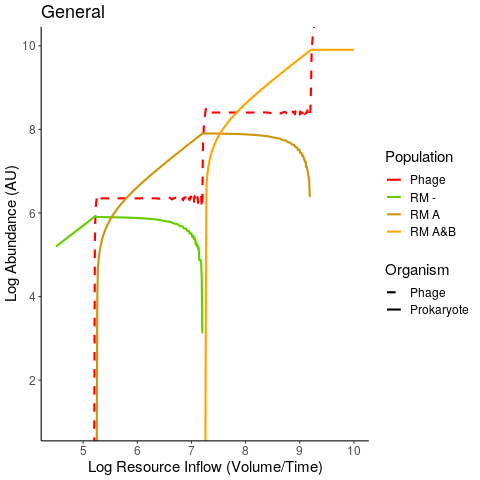

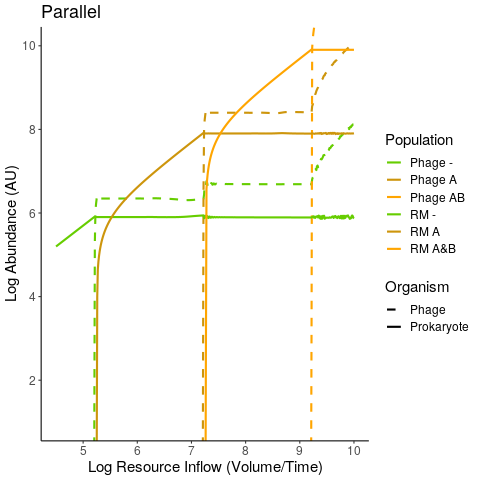

In [12]:
%%R -i dfgen,dfpar

library("ggplot2")
library("gridExtra")

g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) {x$name}) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}

sim_lim=200                      
ylowerlim = 10
yupperlim=10^10
lsize=1


custom_linetype<-scale_linetype_manual(values = c("Prokaryote" = "solid",
                                                 "Phage"="dashed"))
custom_colortype<-scale_color_manual(values = c("Phage" = "red",
                                                 "RM -"="chartreuse3","Phage -"="chartreuse3",
                                               "RM A"="darkgoldenrod3","Phage A"="darkgoldenrod3",
                                              "RM A&B"="orange","Phage AB"="orange",
                                                "RM B&C"="orange","Phage BC"="orange"))



plt_simpleVC<-function(df){
    
  plt<-ggplot(df,aes(x=Sr,y=value,color=Population))+
  geom_line(aes(linetype=Organism),size=lsize)+custom_linetype+custom_colortype+
  theme_bw()+
  labs(x="Log Resource Inflow (Volume/Time)",y="Log Abundance (AU)")+
  theme(panel.border = element_blank(), panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
        axis.line = element_line(color="black"),text = element_text(size=15))+#axis.text=element_text(size=15))+
  scale_x_log10(
   breaks = scales::trans_breaks("log10", function(x) {10^x}),
   labels = scales::trans_format("log10", scales::math_format(.x)))+
  scale_y_log10(
   breaks = scales::trans_breaks("log10", function(x) {10^x}),
   labels = scales::trans_format("log10", scales::math_format(.x)))+
  coord_cartesian(ylim=c(ylowerlim,yupperlim))
    
  return(plt)
}

A<-plt_simpleVC(dfgen)+labs(title="General")
B<-plt_simpleVC(dfpar)+labs(title="Parallel")

print(A)
print(B)


# Results - General and Parallel
The general model predicts competitive exclusion of low RM organsims to high RM organisms as nutrients increase. The parallel model, however, shows that if organisms are preyed upon by their own phage, we see coexistance between competing hosts.


Let's try the memory model. In one situation, RMs will be subsets, while in the other, each organism will have a unqiue set of RM

In [13]:
#Memory
Sr_rng = np.logspace(5,6.5,500)#memory model will have a smaller range of changes
orgRM=[[],["A"],["A","B"]] #Subsets
print("Running Memory Model (Subset)")
r,members,c=Memory_interaction(orgRM,resistance_function=resistance_func,cost_function=cost_func,
                              partial_resistance_function=lambda m:(.5**m))#specifying efficiency of memory
initvalues=[('R',1)]
for member in members:
    initvalues.append(tuple([member,100]))
traits=load_traits(alpha,phi,delta_p,delta_c,beta,c,r)
dfs =Sr_sweep(Sr_rng,GenMem_ODE,initvalues,traits,t_final,steps,seed=True)
df = find_endpoints(dfs)
dfmem_sub = df[['Sr','P_0','P_1','P_2','C_0','C_1','C_2']]
dfmem_sub.columns=['Sr', 'RM -', "RM A", "RM A&B", 'Phage -', 'Phage A', 'Phage AB']
dfmem_sub = pd.melt(dfmem_sub,id_vars='Sr')

dfmem_sub.columns = ['Sr','Population','value']
dfmem_sub=annotate_phage(dfmem_sub)

Running Memory Model (Subset)
Preparing to run 500 simulations between 100000.0 and 3162277.6601683795
100.00% Complete


In [14]:
#Memory
orgRM=[[],["A"],["B","C"]] #Unique sets!
print("Running Memory Model (Subset)")
r,members,c=Memory_interaction(orgRM,resistance_function=resistance_func,cost_function=cost_func,
                              partial_resistance_function=lambda pr:(.5**pr))
initvalues=[('R',1)]
for member in members:
    initvalues.append(tuple([member,100]))
traits=load_traits(alpha,phi,delta_p,delta_c,beta,c,r)
dfs =Sr_sweep(Sr_rng,GenMem_ODE,initvalues,traits,t_final,steps,seed=True)
df = find_endpoints(dfs)
dfmem_unq = df[['Sr','P_0','P_1','P_2','C_0','C_1','C_2']]
dfmem_unq.columns=['Sr', 'RM -', "RM A", "RM B&C", 'Phage -', 'Phage A', 'Phage BC']
dfmem_unq = pd.melt(dfmem_unq,id_vars='Sr')

dfmem_unq.columns = ['Sr','Population','value']
dfmem_unq=annotate_phage(dfmem_unq)

Running Memory Model (Subset)
Preparing to run 500 simulations between 100000.0 and 3162277.6601683795
100.00% Complete


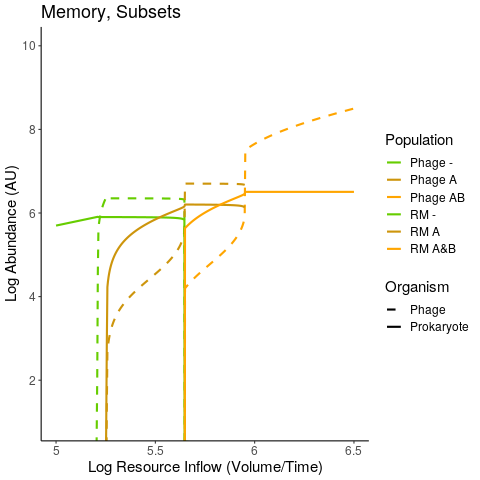

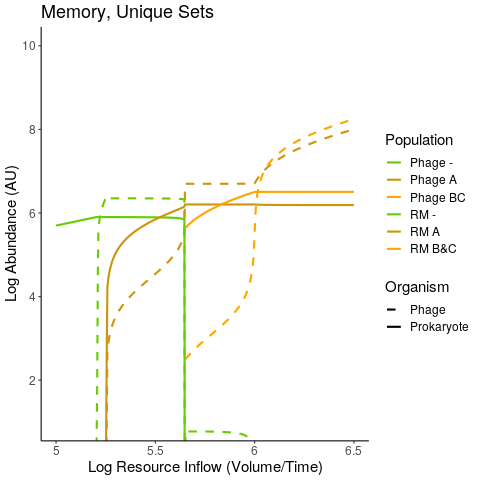

In [15]:
%%R -i dfmem_sub,dfmem_unq

A<-plt_simpleVC(dfmem_sub)+labs(title="Memory, Subsets")
B<-plt_simpleVC(dfmem_unq)+labs(title="Memory, Unique Sets")
print(A)
print(B)

# Results - Memory
Unique sets foster coexistance while subsets lead to competitive exclusion. This concludes the demo of scripts avalible used this study.